In [2]:
import re
import pandas as pd

In [3]:
pattern = r'^\[(\d{2}\/\d{2}\/\d{2}, \d{1,2}:\d{2}:\d{2} [AP]M)\] (.+)$'

# Read the contents of the text document with the appropriate encoding
with open('chats text\mine.txt', 'r', encoding='utf-8') as file:
    lines = file.readlines()

message = []
timestamp = []

for line in lines:
    line = line.strip()  # Remove leading/trailing whitespace if necessary
    m = re.match(pattern, line)
    if m:
        timestamp.append(m.group(1))
        message.append(m.group(2))



In [4]:
df = pd.DataFrame({'user_messages': message, 'message_date': timestamp})


In [5]:
df['message_date'] = pd.to_datetime(timestamp, format='%d/%m/%y, %I:%M:%S %p')
df.rename(columns={'message_date':'date'}, inplace=True)

In [6]:
df.head()

,user_messages,date
0,MINE ❤️: ‎Messages and calls are end-to-end en...,2023-01-27 16:14:02
1,saqqu: Hie,2023-01-27 16:14:02
2,MINE ❤️: Call,2023-01-27 17:10:13
3,saqqu: 6 bje sweetheart abhi sb hai,2023-01-27 17:10:31
4,saqqu: bataye the na,2023-01-27 17:10:33


In [7]:
df.shape

(41246, 2)

In [8]:
df[['user', 'message']] = df['user_messages'].str.split(': ', n=1, expand=True)
df.drop('user_messages', axis=1, inplace=True)


In [9]:
df.head()

,date,user,message
0,2023-01-27 16:14:02,MINE ❤️,‎Messages and calls are end-to-end encrypted. ...
1,2023-01-27 16:14:02,saqqu,Hie
2,2023-01-27 17:10:13,MINE ❤️,Call
3,2023-01-27 17:10:31,saqqu,6 bje sweetheart abhi sb hai
4,2023-01-27 17:10:33,saqqu,bataye the na


In [10]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month_name()
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour
df['minute'] = df['date'].dt.minute

In [11]:
df.sample(15)

,date,user,message,year,month,day,hour,minute
17270,2023-03-14 22:10:57,MINE ❤️,3 bje,2023,March,14,22,10
411,2023-02-02 19:35:52,saqqu,baat toh bht karni hai babe,2023,February,2,19,35
32585,2023-04-16 19:47:48,saqqu,shru shru me love log zyda express krte hai,2023,April,16,19,47
114,2023-02-01 22:19:55,saqqu,or jo saman khareed ne me paisa gaya tmhra woh...,2023,February,1,22,19
33112,2023-04-18 20:50:58,saqqu,😬,2023,April,18,20,50
5401,2023-02-13 00:40:20,MINE ❤️,Ooe,2023,February,13,0,40
13051,2023-03-07 23:54:48,saqqu,hehehe,2023,March,7,23,54
8619,2023-02-23 00:26:14,saqqu,smile kr plz,2023,February,23,0,26
6636,2023-02-16 17:05:48,MINE ❤️,Accha,2023,February,16,17,5
40074,2023-06-06 15:06:15,MINE ❤️,Oye,2023,June,6,15,6


In [12]:
words = []
for i in df['message']:
    words.extend(i.split())

In [13]:
len(words)

105802

In [14]:
df[df['message']== '<image omitted>']

,date,user,message,year,month,day,hour,minute


In [15]:
from urlextract import URLExtract
extractor = URLExtract()

In [16]:
links = []

for i in df['message']:
    links.extend(extractor.find_urls(i))
len(links)

8

In [17]:
x = df['user'].value_counts()

In [18]:
import matplotlib.pyplot as plt

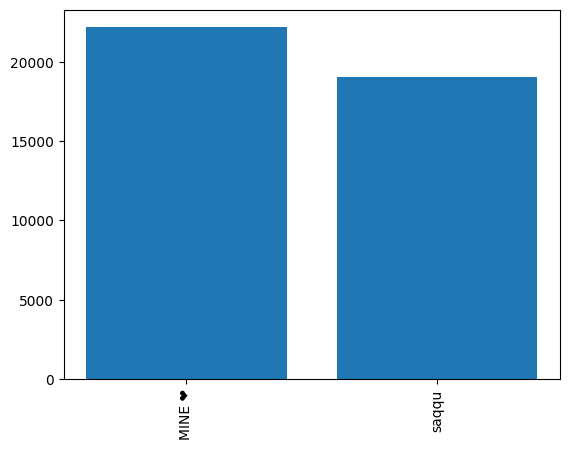

In [19]:
name = x.index
count = x.values

plt.bar(name,count)
plt.xticks(rotation = 'vertical')
plt.show()

In [20]:
round((df['user'].value_counts()/df.shape[0])*100,2).reset_index().rename(columns = {'user':'name','count':'messages'})

,name,messages
0,MINE ❤️,53.78
1,saqqu,46.22


In [21]:
temp = df[df['message'] != 'group_notification']
temp = temp[temp['message'] != '<Media_omitted>\n']

In [22]:
temp

,date,user,message,year,month,day,hour,minute
0,2023-01-27 16:14:02,MINE ❤️,‎Messages and calls are end-to-end encrypted. ...,2023,January,27,16,14
1,2023-01-27 16:14:02,saqqu,Hie,2023,January,27,16,14
2,2023-01-27 17:10:13,MINE ❤️,Call,2023,January,27,17,10
3,2023-01-27 17:10:31,saqqu,6 bje sweetheart abhi sb hai,2023,January,27,17,10
4,2023-01-27 17:10:33,saqqu,bataye the na,2023,January,27,17,10
...,...,...,...,...,...,...,...,...
41241,2023-06-08 02:10:28,MINE ❤️,Good night returns,2023,June,8,2,10
41242,2023-06-08 02:10:31,MINE ❤️,😂😂,2023,June,8,2,10
41243,2023-06-08 02:10:39,saqqu,goodnight finale😂,2023,June,8,2,10
41244,2023-06-08 02:11:12,MINE ❤️,Insta prr,2023,June,8,2,11


In [23]:
f = open('stop_hinglish.txt','r')
stop_words = f.read()

In [24]:
words = []

for i in temp['message']:
    for word in i.lower().split():
        if word not in stop_words:  
            words.append(word)

In [25]:
from collections import Counter

pd.DataFrame(Counter(words).most_common(10)).rename(columns={0:'word',1:'times'}).head(7)

,word,times
0,😅,637
1,😅😅,540
2,😂😂,521
3,call,401
4,love,358
5,😘,329
6,suun,293


In [26]:
import emoji

In [27]:
emojis = []
for message in df['message']:
    emojis.extend([c for c in message if c in emoji.UNICODE_EMOJI['en']])

In [28]:
pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis)))).head(10)

,0,1
0,😂,4376
1,😅,3436
2,😘,1421
3,🥺,1201
4,🤣,769
5,😔,454
6,❤,454
7,😁,320
8,☺,288
9,😒,279


In [29]:
df['month_num'] = df['date'].dt.month

In [30]:
timeline = df.groupby(['year','month_num','month']).count()['message'].reset_index()

In [31]:
time = []
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i]+' - '+str(timeline['year'][i]))

In [32]:
timeline['time'] = time

In [33]:
timeline

,year,month_num,month,message,time
0,2023,1,January,28,January - 2023
1,2023,2,February,11002,February - 2023
2,2023,3,March,11961,March - 2023
3,2023,4,April,11129,April - 2023
4,2023,5,May,4429,May - 2023
5,2023,6,June,2697,June - 2023


In [34]:
timeline.drop(columns=['month_num'],axis=1)

,year,month,message,time
0,2023,January,28,January - 2023
1,2023,February,11002,February - 2023
2,2023,March,11961,March - 2023
3,2023,April,11129,April - 2023
4,2023,May,4429,May - 2023
5,2023,June,2697,June - 2023


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

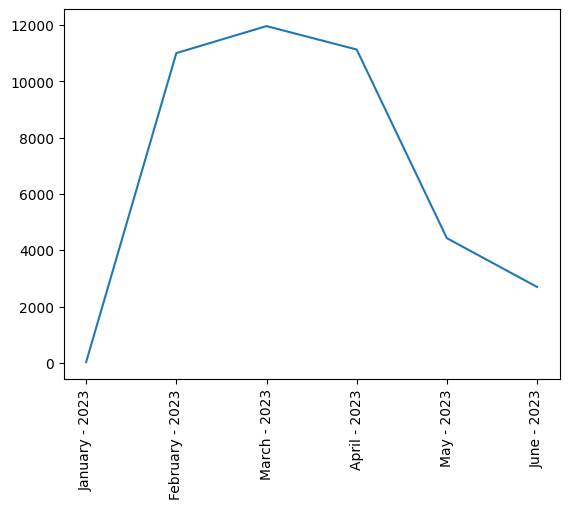

In [35]:
plt.plot(timeline['time'],timeline['message'])
plt.xticks(rotation = 'vertical')

In [36]:
df['only_date'] = df['date'].dt.date

In [37]:
daily_timeline = df.groupby(['only_date']).count()['message'].reset_index()

In [38]:
top_5_days = daily_timeline.nlargest(5, 'message')
top_5_days

,only_date,message
36,2023-03-09,1744
65,2023-04-08,1602
59,2023-04-02,1216
12,2023-02-12,1192
58,2023-04-01,963


In [39]:
def upper(text):
    return text.upper()


In [40]:
text = input()
print(upper(text))

In [53]:
new_df

,user,message,year,month,day,hour,minute,only_date
1,saqqu,Hie,2023,January,27,16,14,2023-01-27
2,MINE ❤️,Call,2023,January,27,17,10,2023-01-27
3,saqqu,6 bje sweetheart abhi sb hai,2023,January,27,17,10,2023-01-27
4,saqqu,bataye the na,2023,January,27,17,10,2023-01-27
5,MINE ❤️,Mtt kr then,2023,January,27,17,10,2023-01-27
...,...,...,...,...,...,...,...,...
41241,MINE ❤️,Good night returns,2023,June,8,2,10,2023-06-08
41242,MINE ❤️,😂😂,2023,June,8,2,10,2023-06-08
41243,saqqu,goodnight finale😂,2023,June,8,2,10,2023-06-08
41244,MINE ❤️,Insta prr,2023,June,8,2,11,2023-06-08


In [61]:
first_last_msg = df.drop(columns=['date','month_num'], axis=1)[1:]
first_last_msg[['user','message','only_date']].head(1).rename(columns={'user':'Sender','only_date':'Date'})

,Sender,message,Date
1,saqqu,Hie,2023-01-27


In [62]:
first_last_msg.columns

Index(['user', 'message', 'year', 'month', 'day', 'hour', 'minute',
       'only_date'],
      dtype='object')

In [59]:
first_last_msg[['user','only_date']].tail(1).rename(columns={'user':'Sender','only_date':'Date'})

,Sender,Date
41245,MINE ❤️,2023-06-08
